In [1]:
# Call the relevant python packages
import numpy as np
import glob, os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.io import ascii

from sedfitter import filter_output, write_parameters, write_parameter_ranges
from sedfitter.extinction import Extinction
from sedfitter import fit, plot

import seaborn as sns
sns.set_context("paper")

%matplotlib inline

# Write fluxes etc. in SED format

In [2]:
# Read in the catalogue of potential YSOs
file = '584_flux.csv'
data = ascii.read(file, data_start=1)

# Print the number of potential YSOs found in the table
YSO_num=len(data)
print("The number of YSO candidates in the table is",YSO_num)

The number of YSO candidates in the table is 584


In [3]:
# Write a column for an index and assign the flag
def write_column(idx,name,flag):
    for i in range(len(idx)):
        # If source is upper limit write 3 flag
        # If source is bad photometry write 0 flag
        data[name][idx[i]]=flag


        
really_good_YSO_path = '518_YSO_SED_0to5/'
onlyfiles = [f for f in listdir(really_good_YSO_path) if isfile(join(really_good_YSO_path, f))]
really_good_YSO_array = np.array([int(onlyfiles[0][0:len(onlyfiles[0])-4])-1])
for i in range(1,len(onlyfiles)):
    filename = onlyfiles[i]
    num_file = int(filename[0:len(filename)-4])
    # take away 1 as 1.pdf corresponds to row 0
    new_array = np.array(num_file-1)
    really_good_YSO_array = np.append(really_good_YSO_array,new_array)
print("Number of files in the Really_Good_YSO folder:",len(really_good_YSO_array))
data['Really_Good_YSO'] = 0
write_column(really_good_YSO_array,'Really_Good_YSO',1)
        
        
good_YSO_path = '518_YSO_SED_5to10/'
onlyfiles = [f for f in listdir(good_YSO_path) if isfile(join(good_YSO_path, f))]
good_YSO_array = np.array([int(onlyfiles[0][0:len(onlyfiles[0])-4])-1])
for i in range(1,len(onlyfiles)):
    filename = onlyfiles[i]
    num_file = int(filename[0:len(filename)-4])
    # take away 1 as 1.pdf corresponds to row 0
    new_array = np.array(num_file-1)
    good_YSO_array = np.append(good_YSO_array,new_array)
print("Number of files in the Good_YSO folder:",len(good_YSO_array))
data['Good_YSO'] = 0
write_column(good_YSO_array,'Good_YSO',1)


bad_YSO_path = '518_YSO_SED_15to20/'
onlyfiles = [f for f in listdir(bad_YSO_path) if isfile(join(bad_YSO_path, f))]
bad_YSO_array = np.array([int(onlyfiles[0][0:len(onlyfiles[0])-4])-1])
for i in range(1,len(onlyfiles)):
    filename = onlyfiles[i]
    num_file = int(filename[0:len(filename)-4])
    # take away 1 as 1.pdf corresponds to row 0
    new_array = np.array(num_file-1)
    bad_YSO_array = np.append(bad_YSO_array,new_array)
print("Number of files in the Bad_YSO folder:",len(bad_YSO_array))
data['Bad_YSO'] = 0
write_column(bad_YSO_array,'Bad_YSO',1)


poss_YSO_path = '518_YSO_SED_10to15/'
onlyfiles = [f for f in listdir(poss_YSO_path) if isfile(join(poss_YSO_path, f))]
poss_YSO_array = np.array([int(onlyfiles[0][0:len(onlyfiles[0])-4])-1])
for i in range(1,len(onlyfiles)):
    filename = onlyfiles[i]
    num_file = int(filename[0:len(filename)-4])
    # take away 1 as 1.pdf corresponds to row 0
    new_array = np.array(num_file-1)
    poss_YSO_array = np.append(poss_YSO_array,new_array)
print("Number of files in the Possible_YSO folder:",len(poss_YSO_array))
data['Possible_YSO'] = 0
write_column(poss_YSO_array,'Possible_YSO',1)


good_SP_path = 'new_SP/good/'
onlyfiles = [f for f in listdir(good_SP_path) if isfile(join(good_SP_path, f))]
good_SP_array = np.array([int(onlyfiles[0][0:len(onlyfiles[0])-4])-1])
for i in range(1,len(onlyfiles)):
    filename = onlyfiles[i]
    num_file = int(filename[0:len(filename)-4])
    # take away 1 as 1.pdf corresponds to row 0
    new_array = np.array(num_file-1)
    good_SP_array = np.append(good_SP_array,new_array)
print("Number of files in the sp_good folder:",len(good_SP_array))
data['sp_good'] = 0
write_column(good_SP_array,'sp_good',1)


bad_SP_path = 'new_SP/bad/'
onlyfiles = [f for f in listdir(bad_SP_path) if isfile(join(bad_SP_path, f))]
bad_SP_array = np.array([int(onlyfiles[0][0:len(onlyfiles[0])-4])-1])
for i in range(1,len(onlyfiles)):
    filename = onlyfiles[i]
    num_file = int(filename[0:len(filename)-4])
    # take away 1 as 1.pdf corresponds to row 0
    new_array = np.array(num_file-1)
    bad_SP_array = np.append(bad_SP_array,new_array)
print("Number of files in the sp_bad folder:",len(bad_SP_array))
data['sp_bad'] = 0
write_column(bad_SP_array,'sp_bad',1)


poss_SP_path = 'new_SP/poss/'
onlyfiles = [f for f in listdir(poss_SP_path) if isfile(join(poss_SP_path, f))]
poss_SP_array = np.array([int(onlyfiles[0][0:len(onlyfiles[0])-4])-1])
for i in range(1,len(onlyfiles)):
    filename = onlyfiles[i]
    num_file = int(filename[0:len(filename)-4])
    # take away 1 as 1.pdf corresponds to row 0
    new_array = np.array(num_file-1)
    poss_SP_array = np.append(poss_SP_array,new_array)
print("Number of files in the Possible_SP folder:",len(poss_SP_array))
data['Possible_SP'] = 0
write_column(poss_SP_array,'Possible_SP',1)
        
# Create catalogues containing only the appropriate potential YSOs which don't also flag as being good SPs
only_really_good_YSO_idx = np.where((data['Really_Good_YSO']==1) & (data['sp_good']==0))
only_really_good_YSO_cat = data[only_really_good_YSO_idx]
only_really_good_YSO_cat.sort('New name')
print("\nThe number of really good YSOs that are not also good SPs is",len(only_really_good_YSO_idx[0]))
only_good_YSO_idx = np.where((data['Good_YSO']==1) & (data['sp_good']==0))
only_good_YSO_cat = data[only_good_YSO_idx]
only_good_YSO_cat.sort('New name')
print("\nThe number of good YSOs that are not also good SPs is",len(only_good_YSO_idx[0]))
only_poss_YSO_idx = np.where((data['Possible_YSO']==1) & (data['sp_good']==0))
only_poss_YSO_cat = data[only_poss_YSO_idx]
only_poss_YSO_cat.sort('New name')
print("\nThe number of possible YSOs that are not also good SPs is",len(only_poss_YSO_idx[0]))

high_prob_idx = np.where(((data['Really_Good_YSO']==1)|(data['Good_YSO']==1)) & (data['sp_good']==0))
high_prob_cat = data[high_prob_idx]
high_prob_cat.sort('New name')
print("\nThe number of high probability YSOs is",len(high_prob_idx[0]))

prob_idx = np.where(((data['Possible_YSO']==1)&(data['sp_good']==0)) | (((data['Really_Good_YSO']==1)|(data['Good_YSO']==1))&(data['sp_good']==1)))
prob_cat = data[prob_idx]
prob_cat.sort('New name')
print("\nThe number of probable YSOs is",len(prob_idx[0]))

poss_YSO_cat = data[bad_YSO_array]

Number of files in the Really_Good_YSO folder: 60
Number of files in the Good_YSO folder: 58
Number of files in the Bad_YSO folder: 54
Number of files in the Possible_YSO folder: 74
Number of files in the sp_good folder: 256
Number of files in the sp_bad folder: 219
Number of files in the Possible_SP folder: 37

The number of really good YSOs that are not also good SPs is 57

The number of good YSOs that are not also good SPs is 48

The number of possible YSOs that are not also good SPs is 50

The number of high probability YSOs is 105

The number of probable YSOs is 63


In [13]:
# Write out the two tables with changed flux in the right format for SED fitter fitting
ascii.write(high_prob_cat[['New name','RA','Dec','J int','H int','K int','36 int','45 int','58 int','80 int','24 int',
                  'J flux','J flux err','H flux','H flux err','K flux','K flux err','36 flux','36 flux err',
                  '45 flux','45 flux err','58 flux','58 flux err','80 flux','80 flux err','24 flux','24 flux err']],
                  'High_Prob_YSO_SED.csv', format='no_header', fast_writer=False)

ascii.write(prob_cat[['New name','RA','Dec','J int','H int','K int','36 int','45 int','58 int','80 int','24 int',
                  'J flux','J flux err','H flux','H flux err','K flux','K flux err','36 flux','36 flux err',
                  '45 flux','45 flux err','58 flux','58 flux err','80 flux','80 flux err','24 flux','24 flux err']],
                  'Prob_YSO_SED.csv', format='no_header', fast_writer=False)

ascii.write(poss_YSO_cat[['New name','RA','Dec','J int','H int','K int','36 int','45 int','58 int','80 int','24 int',
                  'J flux','J flux err','H flux','H flux err','K flux','K flux err','36 flux','36 flux err',
                  '45 flux','45 flux err','58 flux','58 flux err','80 flux','80 flux err','24 flux','24 flux err']],
                  'Possible_YSO_SED.csv', format='no_header', fast_writer=False)

ascii.write(high_prob_cat, 'High_Prob_YSO_Photometry.csv', format='csv')
ascii.write(prob_cat, 'Prob_YSO_Photometry.csv', format='csv')
ascii.write(poss_YSO_cat, 'Poss_YSO_Photometry.csv', format='csv')

# Location Plots of good/bad YSOs

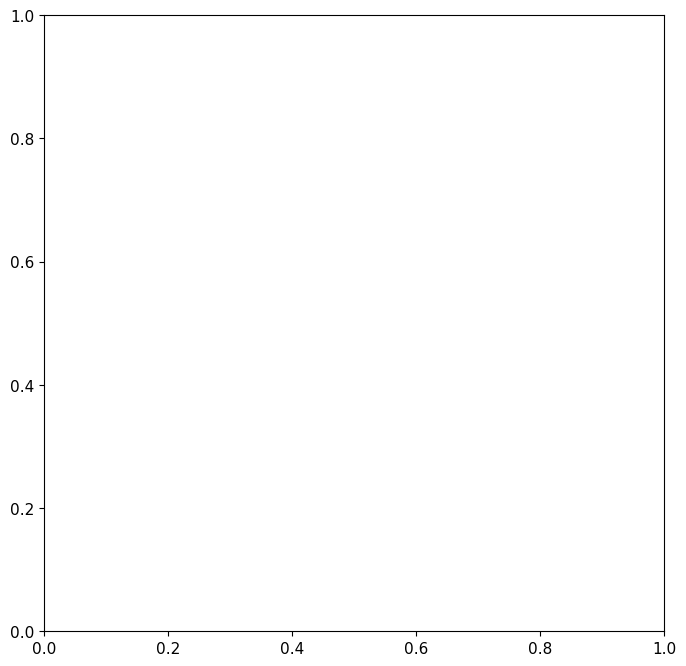

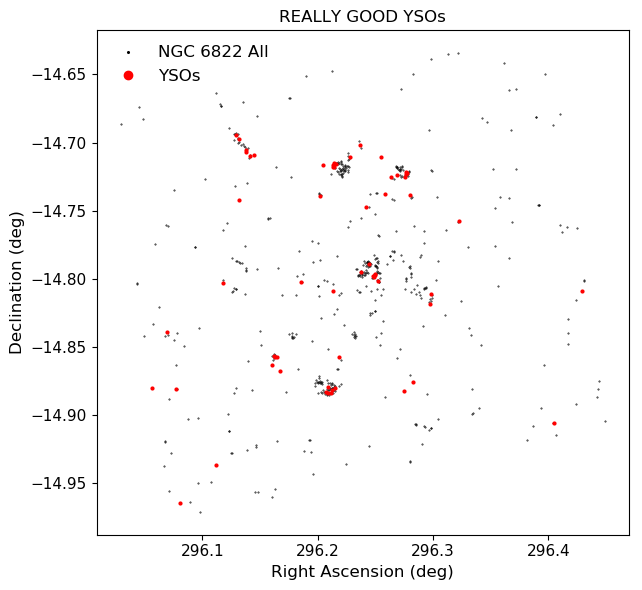

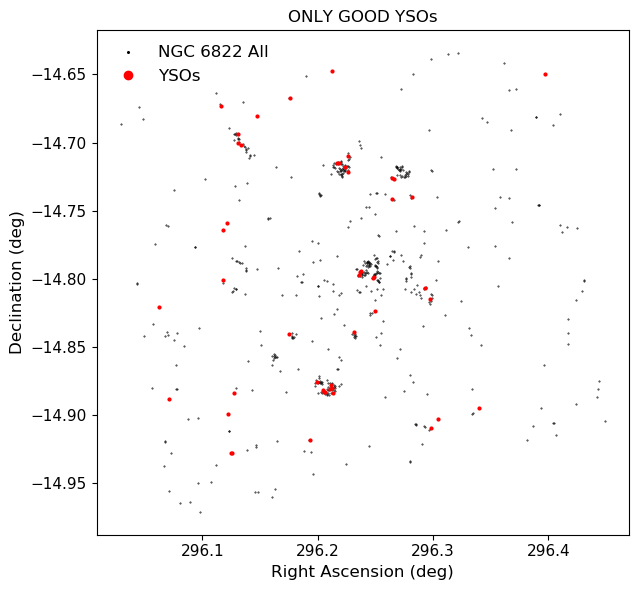

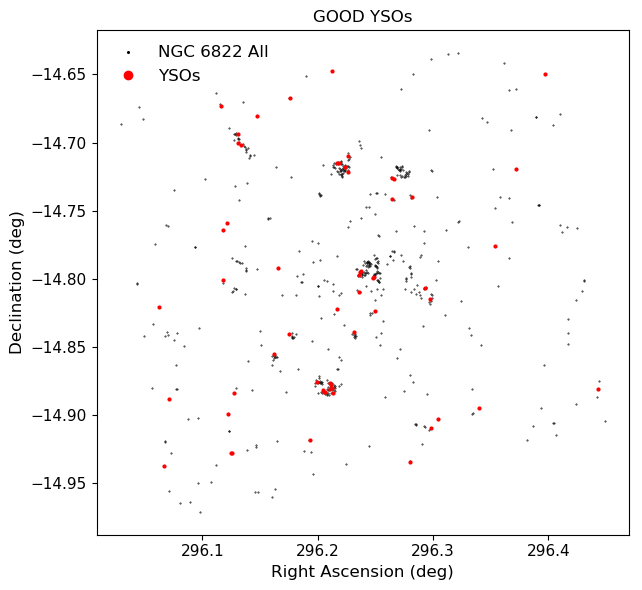

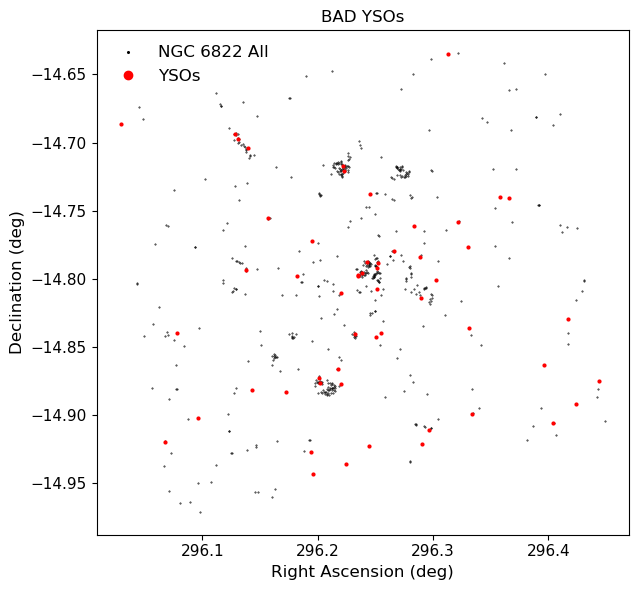

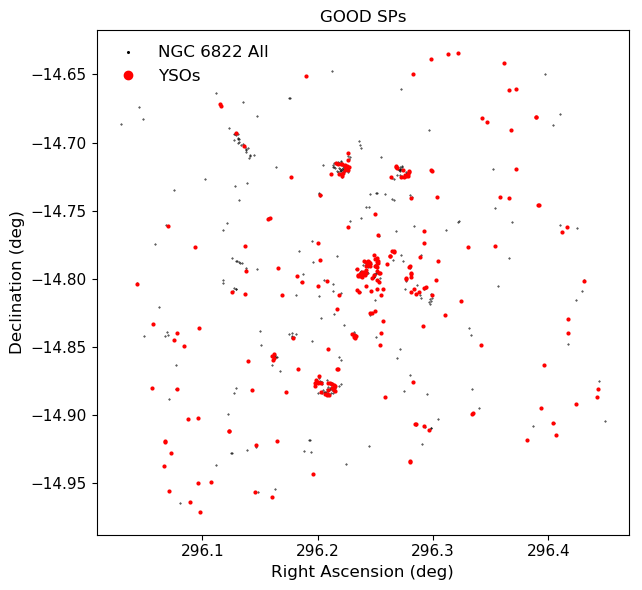

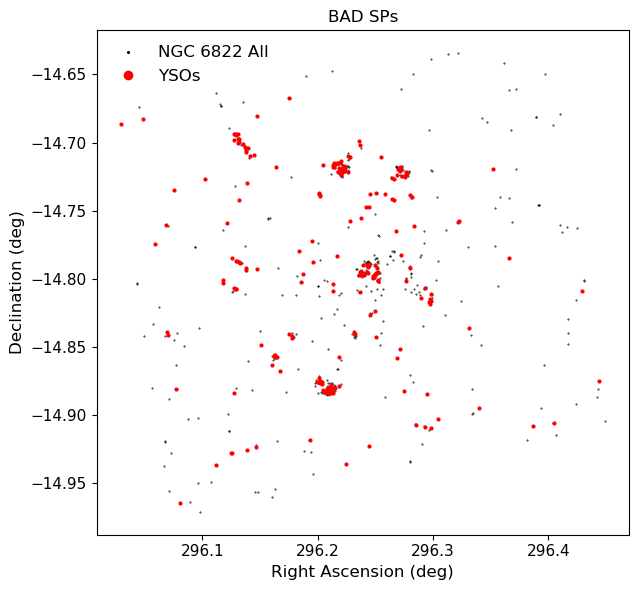

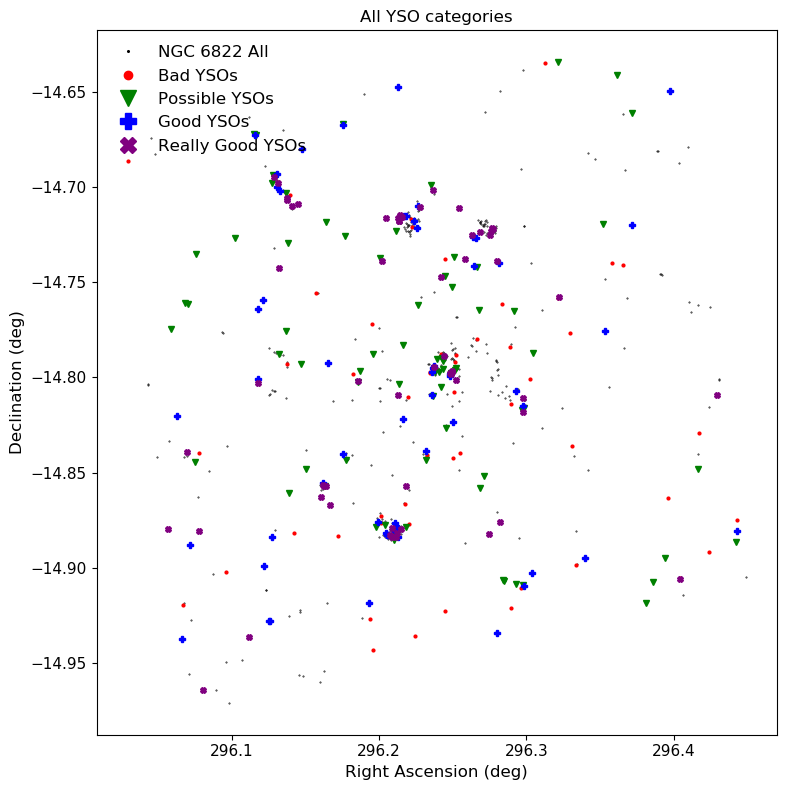

In [6]:
# Read in YSO table to plot as background
table_file = '584_flux.csv'
table = ascii.read(table_file, data_start=1)

# Find reliably-scored sources and index their positions
reliable_idx=((table['SpNum']>=3)|((table['HJKNum']>=2) & (table['45 data?']==1) & (table['36 data?']==1)))
reliable_cat=table[reliable_idx]
idx_rel_score=np.where(reliable_cat['YSO Score']>=3)

# Function to overplot a set of candidates onto the galaxy
def location_plot(sp_idx,plot_idx,title):
    # Plot the cataloge data on the sky
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=11)
    plt.rc("ytick", labelsize=11)
    plt.rc("axes", labelsize=11)
    plt.rc("legend", fontsize=12)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    
    # Setting up figure
    plt.figure(figsize=(12,6))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.plot(reliable_cat['RA'], reliable_cat['Dec'], '.', color='black', ms=0.8, label="NGC 6822 All")
    
    #overplot all reliable sources that meet the cut
    plt.plot(reliable_cat['RA'][plot_idx], reliable_cat['Dec'][plot_idx], '.', color='red', ms=4, label="YSOs")
    
    plt.xlabel('Right Ascension (deg)', size=12)
    plt.ylabel('Declination (deg)', size=12)
    
    # Add a legend and a title
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title(title)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()

location_plot(idx_rel_score,really_good_YSO_array,'REALLY GOOD YSOs')
location_plot(idx_rel_score,only_good_YSO_idx,'ONLY GOOD YSOs')
location_plot(idx_rel_score,good_YSO_array,'GOOD YSOs')
location_plot(idx_rel_score,bad_YSO_array,'BAD YSOs')
location_plot(idx_rel_score,good_SP_array,'GOOD SPs')
location_plot(idx_rel_score,bad_SP_array,'BAD SPs')

'''
# Function to overplot two sets of candidates onto the galaxy
def location_plot_two(sp_idx,plot_idx,poss_idx,title):
    # Plot the cataloge data on the sky
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=17)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.plot(reliable_cat['RA'], reliable_cat['Dec'], '.', color='black', ms=0.8, label="NGC 6822 All")
    
    #overplot all reliable sources that meet the cut
    plt.plot(reliable_cat['RA'][plot_idx], reliable_cat['Dec'][plot_idx], '.', color='red', ms=4, label="Good YSOs")
    plt.plot(reliable_cat['RA'][poss_idx], reliable_cat['Dec'][poss_idx], '.', color='green', ms=4, label="Possible YSOs")
        
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    
    # Add a legend and a title
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title(title)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
    
location_plot_two(idx_rel_score,only_good_YSO_idx,poss_YSO_idx,'POSSIBLE YSOs')
location_plot_two(idx_rel_score,good_YSO_array,only_good_YSO_idx,'good (red) vs only good (green) YSOs - would be including red points if including both good YSO+SP')
'''


# Plot all 4 YSO categories on the same location plot
plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values
    
    
# Setting up figure
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region
    
# Make the actual plot
plt.plot(reliable_cat['RA'], reliable_cat['Dec'], '.', color='black', ms=0.8, label="NGC 6822 All")
    
#overplot all reliable sources that meet the cut
plt.plot(reliable_cat['RA'][bad_YSO_array], reliable_cat['Dec'][bad_YSO_array], '.', color='red', ms=4, label="Bad YSOs")
plt.plot(reliable_cat['RA'][poss_YSO_array], reliable_cat['Dec'][poss_YSO_array], 'v', color='green', ms=4, label="Possible YSOs")
plt.plot(reliable_cat['RA'][good_YSO_array], reliable_cat['Dec'][good_YSO_array], 'P', color='blue', ms=4, label="Good YSOs")
plt.plot(reliable_cat['RA'][really_good_YSO_array], reliable_cat['Dec'][really_good_YSO_array], 'X', color='purple', ms=4, label="Really Good YSOs")
    
plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)
    
# Add a legend and a title
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
plt.title('All YSO categories')
    
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.show()
plt.close()

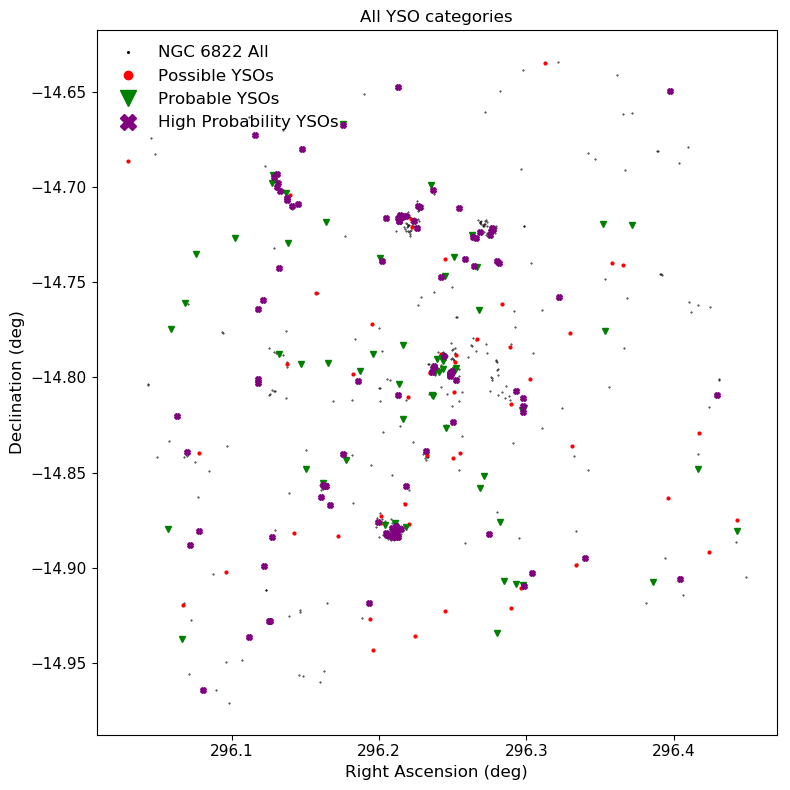

In [10]:
# Plot all 4 YSO categories on the same location plot - ONLY good,poss,really good
plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values
    
    
# Setting up figure
plt.figure(figsize=(8,8))
ax = plt.gca()                        # Sets up active plot region
    
# Make the actual plot
plt.plot(reliable_cat['RA'], reliable_cat['Dec'], '.', color='black', ms=0.8, label="NGC 6822 All")
    
#overplot all reliable sources that meet the cut
plt.plot(reliable_cat['RA'][bad_YSO_array], reliable_cat['Dec'][bad_YSO_array], '.', color='red', ms=4, label="Possible YSOs")
plt.plot(reliable_cat['RA'][prob_idx], reliable_cat['Dec'][prob_idx], 'v', color='green', ms=4, label="Probable YSOs")
#plt.plot(reliable_cat['RA'][only_good_YSO_idx], reliable_cat['Dec'][only_good_YSO_idx], 'P', color='blue', ms=4, label="Only Good YSOs")
#plt.plot(reliable_cat['RA'][only_really_good_YSO_idx], reliable_cat['Dec'][only_really_good_YSO_idx], 'X', color='purple', ms=4, label="Only Really Good YSOs")
plt.plot(reliable_cat['RA'][high_prob_idx], reliable_cat['Dec'][high_prob_idx], 'X', color='purple', ms=4, label="High Probability YSOs")

    
plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)
    
# Add a legend and a title
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
plt.title('All YSO categories')
    
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
# Write out table in the right format for SED fitter
output_text_file = 'good_YSOs.txt'
ascii.write(good_YSO_cat[['New name','RA','Dec','J int','H int','K int','36 int','45 int','58 int','80 int','24 int',
                          'J flux','J flux err','H flux','H flux err','K flux','K flux err','36 flux','36 flux err',
                          '45 flux','45 flux err','58 flux','58 flux err','80 flux','80 flux err','24 flux','24 flux err']],
                          output_text_file, format='no_header', fast_writer=False)

# YSO Fitting

In [17]:
# Define path to models
model_dir = 'models_YSO_2006/'

# Read in extinction law
extinction = Extinction.from_file('Input_SED/kmh94.par',
                                  columns=[0, 3], wav_unit=u.micron, chi_unit=u.cm**2 / u.g)

# Define filters and apertures
filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4', 'M1']
apertures = [2., 2., 2., 1.2, 1.2, 1.2, 1.2, 6.] * u.arcsec


# Run the fitting
# Creates an output file which can be saved and plotted later
# YSO 2006 models take a long time to run - too long for the kernel to run in one go.
# Define start and end sources to run - the user must have trimmed the master table to the appropriate limits
start_source = str(293)
end_source = str(584)
SED_input_file = 'Possible_YSO_SED.txt'
SED_output_file = 'Possible_YSO_SED.fitinfo'
data = ascii.read(SED_input_file, data_start=1)
fit(SED_input_file, filters, apertures, model_dir,
    SED_output_file,
    extinction_law=extinction,
    distance_range=[450., 530.] * u.kpc,     # Distance range here is for NGC 6822
    av_range=[0., 40.])                      # A_V range here is for NGC 6822

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  YSO models
   Log[d] stepping     :  0.01
   Number of distances :  8

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading models_YSO_2006//convolved/2J.fits
   Reading models_YSO_2006//convolved/2H.fits
   Reading models_YSO_2006//convolved/2K.fits
   Reading models_YSO_2006//convolved/I1.fits
   Reading models_YSO_2006//convolved/I2.fits
   Reading models_YSO_2006//convolved/I3.fits
   Reading models_YSO_2006//convolved/I4.fits
   Reading models_YSO_2006//convolved/M1.fits
 ------------------------------------------------------------
  => Fitting parameters
 ------------------------------------------------------------

   Minimum A_V      :     0.000 mag
   Maximum A_V      :    40.000 mag
   Minimu

# Write parameters

In [2]:
#plot('/Disk/ds-sopa-ifa-ug/s1625982/fred/Output_SED/Only_Good_YSO.fitinfo',
     #'/Disk/ds-sopa-ifa-ug/s1625982/fred/Only_Good_YSO',select_format=('F', 0.5))

In [3]:
# Write parameters to a txt file using the "delta X^2 < 3" format.
# NB: open the file in Excel and choose 'merge delimiters' to make it more coherent

pref_list = ['High_Prob','Prob','Possible']
for i in range(len(pref_list)):
    prefix = pref_list[i]
    input_param_file = pref_list[i]+'_YSO_SED.fitinfo'
    output_param_file = pref_list[i]+'_YSO_param.txt'
    write_parameters(input_param_file, output_param_file,select_format=('F', 1.))
    output_param_file = pref_list[i]+'_YSO_ranges.txt'
    write_parameter_ranges(input_param_file, output_param_file,select_format=('F', 1.))